<a href="https://colab.research.google.com/github/VR952004/DataAnalysisProjects/blob/main/BreastCancerDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
link=f'/content/drive/MyDrive/csv files/breast_cancer_survival.csv'

df=py.read_csv(link)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [ ]:
df.dropna(inplace=True)   #Dropping the null values

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [ ]:
#The beginning and ending date of the treatment seem to be irrelevant to detection of breast cancer itself therefore dropping those columns
df.drop(columns=["Date_of_Surgery","Date_of_Last_Visit"],axis=1,inplace=True)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive


In [ ]:
df.Histology.value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

**Understanding the various terms in the data frame:**

1) Histology is the study of microscopic structure of tissues.There are currently three different histologies mention in our dataset, this means that the histology in this case is the analysis of cellular and chemical properties of the cells which are suspicious of being breast tumors.

1.   Infiltrating Ductal Carcinoma is a type of breast cancer that starts in the milk ducts of the breast and moves into nearby tissue.
2.   Infiltrating Lobular Carcinoma is the type breast cancer that starts in the milk-producing gland, or lobules and has spread into surrounding breast tissue.
3. Mucinous Carcinoma is generally a rare type of cancer which starts from the main cells of mucus. This type is often less aggressive than the other types

2) Two hormones Estrogen and Progesterone are present in a female, for cells to use these hormones they require a receptor for each of these hormones. So these tests help the doctors know whether the cancer cells contain these receptors or not, which in-turn tells if the cancer cells are using these hormones for their growth or not. In this case, medicatioin can be provided which will lower the hormone level or stop the hormone from fueling the cancer growth.

3)HER2 is a gene. This gene produces a protein called HER2 which causes the growth of cells faster, thus a positive HER2 means that the rate of growth of the cancer cells is rapid.




In [ ]:
print('Mean age:',df.Age.mean())
print('Median age:',df.Age.median())
print('Mode age:',df.Age.mode())

Mean age: 58.72555205047318
Median age: 58.0
Mode age: 0    59
Name: Age, dtype: int64


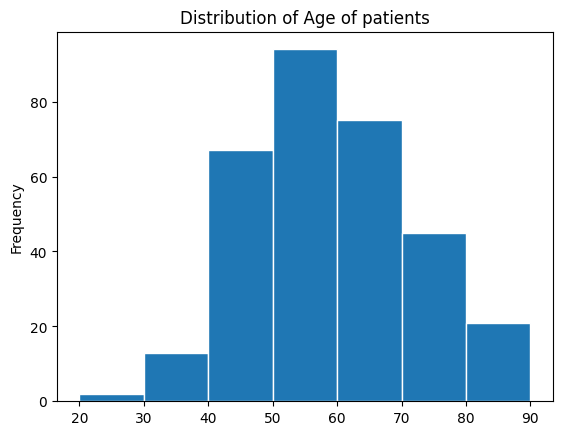

In [ ]:
#Visulaizing the distribution of age of the patients

vis1=df.query('Age > 0')["Age"]

bins=[20,30,40,50,60,70,80,90]

vis1.plot(
    kind="hist", bins=bins, title="Distribution of Age of patients", edgecolor='white'
)
plt.show()

In the above Histogram we can observe a no skew distribution, we can even see the same from the calculations above the distributon.

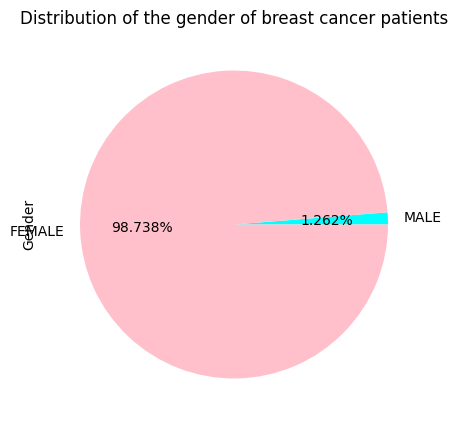

In [ ]:
vis2=df["Gender"].value_counts(ascending=True)

vis2 = df["Gender"].value_counts(ascending=True)
labels = vis2.index

vis2.plot(
    kind="pie", figsize=(10, 5), title="Distribution of the gender of breast cancer patients",colors=["cyan", "pink"],autopct='%0.3f%%',
)
plt.legend().set_visible(False)

plt.show()

This pie chart shows that breast cancer is very rare in males.

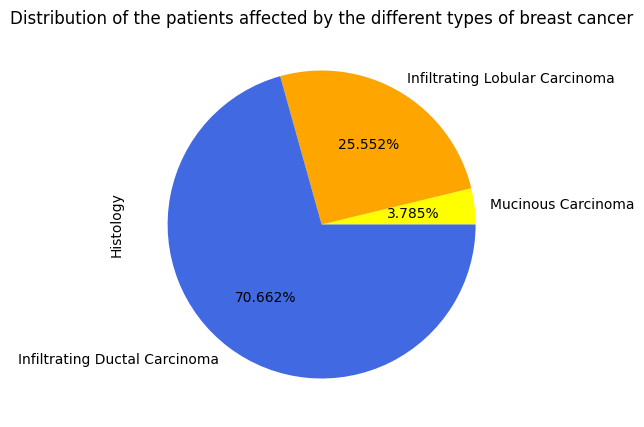

In [ ]:
vis3=df["Histology"].value_counts(ascending=True)
vis3.plot(
    kind="pie", figsize=(10, 5), title="Distribution of the patients affected by the different types of breast cancer",colors=["yellow", "orange", "royalblue"],autopct='%0.3f%%'
)
plt.show()


This pie chart shows that majority of the patients are affected with Infiltrating Ductal Carcinoma.

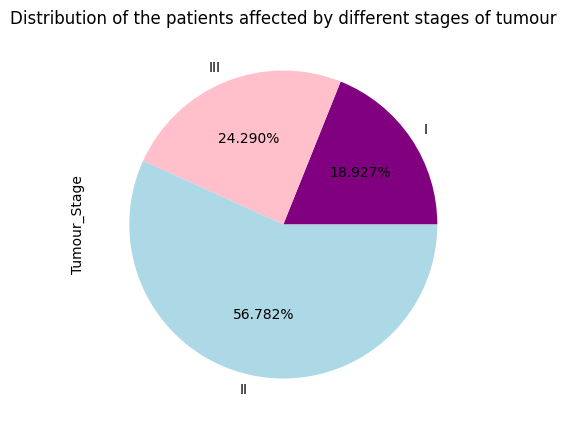

In [ ]:
vis4=df["Tumour_Stage"].value_counts(ascending=True)
vis4.plot(
    kind="pie", figsize=(10, 5), title="Distribution of the patients affected by different stages of tumour",colors=["purple", "pink", "lightblue"],autopct='%0.3f%%'
)
plt.show()

This pie chart shows that majority of the patients have detected the cancer much later than when it began, thats why there is a higher percentage of patients in stage II or III of their tumour.Thankfully majority the patients were able to detect the tumour before it was too late (i.e. in stage II instead of III)

In [ ]:
er=df.groupby('Histology')['ER status'].value_counts(normalize=True)
print(er,"\n")

pr=df.groupby('Histology')['PR status'].value_counts(normalize=True)
print(pr,"\n")

her2=df.groupby('Histology')['HER2 status'].value_counts(normalize=True)
print(her2,"\n")

Histology                       ER status
Infiltrating Ductal Carcinoma   Positive     1.0
Infiltrating Lobular Carcinoma  Positive     1.0
Mucinous Carcinoma              Positive     1.0
Name: ER status, dtype: float64 

Histology                       PR status
Infiltrating Ductal Carcinoma   Positive     1.0
Infiltrating Lobular Carcinoma  Positive     1.0
Mucinous Carcinoma              Positive     1.0
Name: PR status, dtype: float64 

Histology                       HER2 status
Infiltrating Ductal Carcinoma   Negative       0.906250
                                Positive       0.093750
Infiltrating Lobular Carcinoma  Negative       0.913580
                                Positive       0.086420
Mucinous Carcinoma              Negative       0.916667
                                Positive       0.083333
Name: HER2 status, dtype: float64 



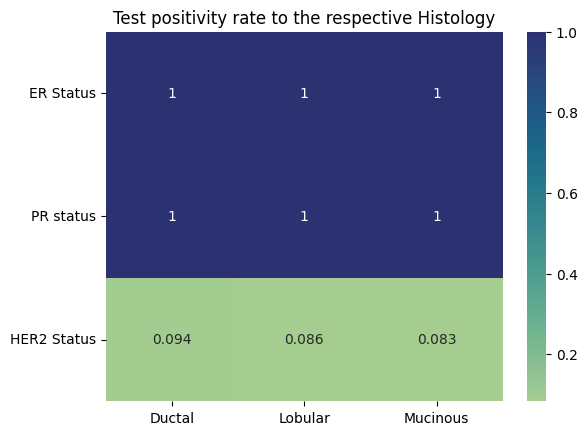

In [ ]:
Index=['ER Status','PR status','HER2 Status']

df1=py.DataFrame({'Ductal':[1,1,0.09375000] , 'Lobular':[1,1,0.08641975] , 'Mucinous':[1,1,0.08333333]}
                 ,index=Index)

sns.heatmap(df1, annot=True , cmap='crest')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Test positivity rate to the respective Histology")

plt.show()

This heat map indicates that for cancer to occur the ER and PR tests have to be positive. Which means that the tumour cells have the respective rececptors and thus the hormone treatment can be given to all of the patients. But not all patients that have detected cancer have tested positive for the HER2 test. This is because HER2 is a gene and it may or may not be present in the patient, therefore there are patients that haven't tested positive for this test. Furthermore, we can say that the HER2 gene is rare thereby showing only a small percentage of the patients testing positive for it.   

In [ ]:
prot_1=df.groupby('Histology')['Protein1'].mean()
print(prot_1,"\n")

prot_2=df.groupby('Histology')['Protein2'].mean()
print(prot_2,"\n")

prot_3=df.groupby('Histology')['Protein3'].mean()
print(prot_3,"\n")

prot_4=df.groupby('Histology')['Protein4'].mean()
print(prot_4,"\n")


Histology
Infiltrating Ductal Carcinoma    -0.044289
Infiltrating Lobular Carcinoma   -0.009892
Mucinous Carcinoma                0.174120
Name: Protein1, dtype: float64 

Histology
Infiltrating Ductal Carcinoma     0.926194
Infiltrating Lobular Carcinoma    1.053536
Mucinous Carcinoma                0.683807
Name: Protein2, dtype: float64 

Histology
Infiltrating Ductal Carcinoma    -0.075366
Infiltrating Lobular Carcinoma   -0.176218
Mucinous Carcinoma                0.083965
Name: Protein3, dtype: float64 

Histology
Infiltrating Ductal Carcinoma     0.007008
Infiltrating Lobular Carcinoma   -0.016640
Mucinous Carcinoma                0.158838
Name: Protein4, dtype: float64 



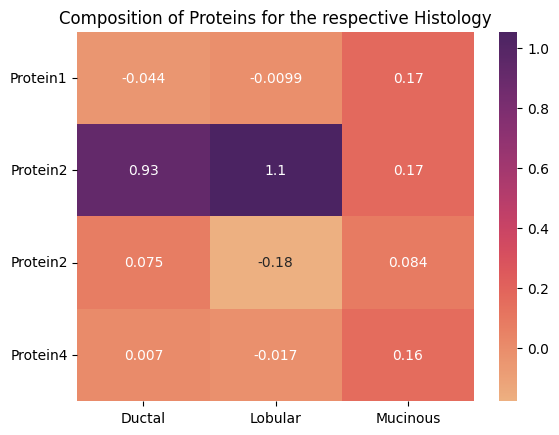

In [ ]:
Index=['Protein1','Protein2','Protein2','Protein4']

df2=py.DataFrame({'Ductal':[-0.044289,0.926194,0.075366,0.007008] , 'Lobular':[-0.009892,1.053536,-0.176218,-0.016640] , 'Mucinous':[0.174120,0.174120,0.083965,0.158838]}
                 ,index=Index)

sns.heatmap(df2, annot=True , cmap='flare')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Composition of Proteins for the respective Histology")

plt.show()

Therefore, from the above heatmap we can say that Infiltrating Ductal Carcinoma and Infiltrating Lobular Carcinoma occurs due to the increase in Protein 2. Mucinous Carcinoma occurs due to the increase in Protien 3.

Similarly, we can find the correlation between the stage of the tumour and the status of the patient if they are alive or dead.

In [ ]:
df_agg = df.groupby("Histology")["Patient_Status"].value_counts(normalize=True).unstack() * 100
col_order = ["Alive", "Dead"]
df_agg[col_order].style.background_gradient(cmap="Blues")

Patient_Status,Alive,Dead
Histology,,
Infiltrating Ductal Carcinoma,79.910714,20.089286
Infiltrating Lobular Carcinoma,82.716049,17.283951
Mucinous Carcinoma,75.000000,25.000000


This shows that majority of the patients have recovered and are still alive. Out of all the different types of breast cancer, Mucinous Carcinoma seems to be more fatal than the other two, followed by Ductal Carcinoma.

In [ ]:
df['Surgery_type'].value_counts()

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

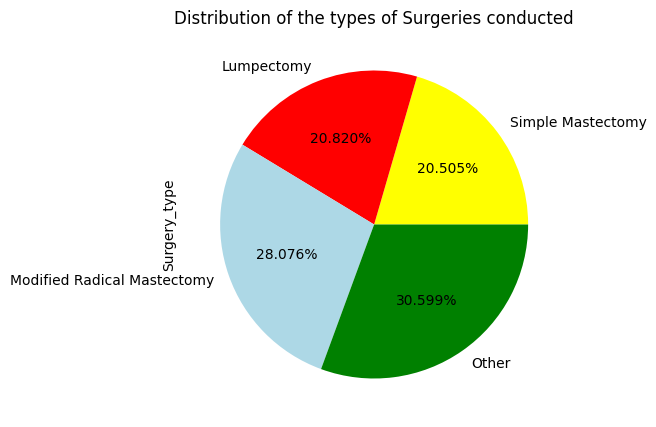

In [ ]:
vis4=df["Surgery_type"].value_counts(ascending=True)
vis4.plot(
    kind="pie", figsize=(10, 5), title="Distribution of the types of Surgeries conducted",colors=["yellow", "red", "lightblue","green"],autopct='%0.3f%%'
)
plt.show()

In [ ]:
lump=df.groupby('Histology')['Surgery_type'].value_counts(normalize=True)*100
print(lump,"\n")

Histology                       Surgery_type               
Infiltrating Ductal Carcinoma   Other                          29.464286
                                Modified Radical Mastectomy    27.232143
                                Simple Mastectomy              21.875000
                                Lumpectomy                     21.428571
Infiltrating Lobular Carcinoma  Other                          38.271605
                                Modified Radical Mastectomy    28.395062
                                Simple Mastectomy              17.283951
                                Lumpectomy                     16.049383
Mucinous Carcinoma              Lumpectomy                     41.666667
                                Modified Radical Mastectomy    41.666667
                                Simple Mastectomy              16.666667
Name: Surgery_type, dtype: float64 



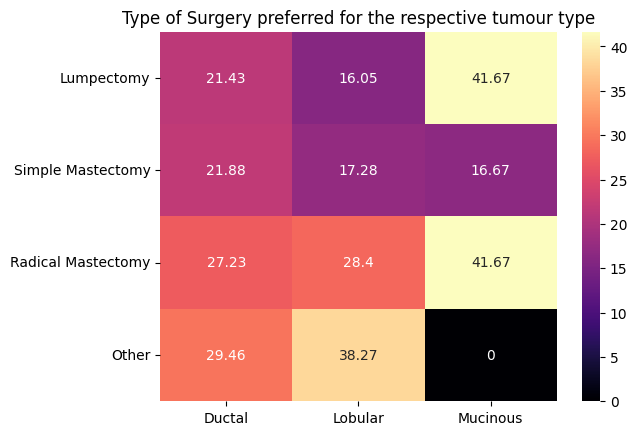

In [ ]:
Index=['Lumpectomy','Simple Mastectomy','Radical Mastectomy','Other']

df3=py.DataFrame({'Ductal':[21.428571,21.875000,27.232143,29.464286] , 'Lobular':[16.049383,17.283951,28.395062,38.271605] , 'Mucinous':[41.666667,16.666667,41.666667,0]}
                 ,index=Index)

sns.heatmap(df3, annot=True , cmap='magma',fmt='.4g')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Type of Surgery preferred for the respective tumour type")

plt.show()

We can see the different types of breast cancer prefers different type of surgery.

* Ductal Carcinoma prefers Modified Radical Mastectomy and Other type of surgery.

* Lobular Carcinoma also prefers Modified Radical Mastectomy and Other type of surgery.

* Whereas Mucinous Carcinoma prefers Lumpectomy and Modified Radical Mastectomy.

In [ ]:
df_agg = df.groupby("Surgery_type")["Patient_Status"].value_counts(normalize=True).unstack() * 100
col_order = ["Alive", "Dead"]
df_agg[col_order].style.background_gradient(cmap="Purples")

Patient_Status,Alive,Dead
Surgery_type,,
Lumpectomy,86.363636,13.636364
Modified Radical Mastectomy,80.898876,19.101124
Other,75.257732,24.742268
Simple Mastectomy,81.538462,18.461538


The pie chart shows that the surgery type are fairly equally distributed. But from the heatmap we can say that other surgery types are more successful than the "Other" surgery type. Out of which Lumpectomy has the highest success rate out all the surgey types.

Now to summarize the conclusions made from the data set:


*   The age of the patients range from 29 to 90. Out of which the majority of the patients are from the age-group 40 to 70. The majority of the patients being females, with a few rare cases of breast cancer in males.
*   There are 3 types of breast cancer out of which the majority of the patients are afflicted by Infiltrating Ductal Carcinoma. Followed by Infiltrating Lobular Carcinoma. Mucinous Carcinoma is a rare type of breast cancer.
*   There are 3 stages of a tumour:
      
      Stage I : The cancer is localized to a small area and hasn't spread to lymph nodes or other tissues.
      
      Stage II: The cancer has grown, but it hasn't spread.
      
      Stage III: The cancer has grown larger and has possibly spread to lymph nodes or other tissues.

      This could even indicate the time elapsed to detect the tumour. From the data set, we can say that most of the patients have detected Stage II tumour which means that they have detected the tumour at a stage where it is not too late to to treat the tumour. But the percentage of patients detecting tumour early on (i.e. Stage I) is lesser than the patients that have been critically affected by the tumour.

*   Now to understanding the cause of the tumour we can analyse the proteins constituting the tumour cells as well as the receptors and enzymes due a particular gene.

  We can deduce, that for cancer to occur the tumour cells need to have Estrogen and Progesterone receptors need to be present. This is shown by the 100% positivity rate of the patients from these tests. Whereas, HER2 enzyme may or may not be present in the tumour cell depending on whether the patient has the HER2 gene or not. This is shown by the data of majority of patients not testing positive for this test.

  Now, for the protein composition, we can conclude that increased amount of protein 2 in the tumour cell causes Ductal and Lobular Carcinoma. Whereas, increase in the composition of protein 3 causes Mucinous Carcinoma.

*   Now to deduce the fatality rate of each of the type of breast cancer. We can determine that using the percentage of the patients alive after the treatment of the particular type of tumour. From the heat map we can see that Lobular has the least percentage of deaths, followed by the Ductal Carcinoma. Mucinous Carcinoma has the higest rate of deaths among the three types. Therefore, we can say that Mucinous Carcinoma is the most fatal type of breast cancer.

*  We can see that there are various types of surgeries and treatments that can be perfomed on the patients to cure their cancer. From the pie chart we can say that all the different types of surgeries are fairly equally preferred by the doctors(i.e. there isn't a drastic difference between each of the surgery types). But when it comes to the success rates of the surgeries, we can conclude that Lumpectomy has the highest success rate of all the surgery types.



